In [0]:
#from pyspark.sql import SparkSession
#spark = SparkSession.builder().getOrCreate()

In [0]:
df = spark.read.csv('dbfs:/FileStore/shared_uploads/ashu.tiwari.9741@gmail.com/sales_data__1_.csv',header = True)
df.show(2)

+--------+------------------+----------------+----------+--------------+--------------------+
|Order ID|           Product|Quantity Ordered|Price Each|    Order Date|    Purchase Address|
+--------+------------------+----------------+----------+--------------+--------------------+
|  295665|Macbook Pro Laptop|               1|      1700|12/30/19 00:01|136 Church St, Ne...|
|  295666|LG Washing Machine|               1|     600.0|12/29/19 07:03|562 2nd St, New Y...|
+--------+------------------+----------------+----------+--------------+--------------------+
only showing top 2 rows



In [0]:
from pyspark.sql.functions import col #Column
#import pyspark.sql.functions.*


In [0]:
df.describe().show()

df.na.drop('any')

+-------+------------------+------------+------------------+------------------+--------------+--------------------+
|summary|          Order ID|     Product|  Quantity Ordered|        Price Each|    Order Date|    Purchase Address|
+-------+------------------+------------+------------------+------------------+--------------+--------------------+
|  count|            186850|      186850|            186850|            186850|        186850|              186850|
|   mean| 230417.5693788653|        null|1.1243828986286637|184.39973476749344|          null|                null|
| stddev|51512.737109995825|        null|0.4427926240286699|332.73132988434395|          null|                null|
|    min|            141234|20in Monitor|                 1|            109.99|01/01/19 03:07|1 11th St, Atlant...|
|    max|              null|        null|              null|              null|          null|                null|
+-------+------------------+------------+------------------+------------

In [0]:
df.select(col("Product"),col('Order ID')).show()

+--------------------+--------+
|             Product|Order ID|
+--------------------+--------+
|  Macbook Pro Laptop|  295665|
|  LG Washing Machine|  295666|
|USB-C Charging Cable|  295667|
|    27in FHD Monitor|  295668|
|USB-C Charging Cable|  295669|
|AA Batteries (4-p...|  295670|
|USB-C Charging Cable|  295671|
|USB-C Charging Cable|  295672|
|Bose SoundSport H...|  295673|
|AAA Batteries (4-...|  295674|
|USB-C Charging Cable|  295675|
|     ThinkPad Laptop|  295676|
|AA Batteries (4-p...|  295677|
|AAA Batteries (4-...|  295678|
|USB-C Charging Cable|  295679|
|Lightning Chargin...|  295680|
|        Google Phone|  295681|
|USB-C Charging Cable|  295681|
|Bose SoundSport H...|  295681|
|    Wired Headphones|  295681|
+--------------------+--------+
only showing top 20 rows



In [0]:
df.dropna('any')
df.filter(col('Product')!='null').describe().show()

+-------+------------------+------------+------------------+------------------+--------------+--------------------+
|summary|          Order ID|     Product|  Quantity Ordered|        Price Each|    Order Date|    Purchase Address|
+-------+------------------+------------+------------------+------------------+--------------+--------------------+
|  count|            186305|      186305|            186305|            186305|        186305|              186305|
|   mean| 230417.5693788653|        null|1.1243828986286637|184.39973476749344|          null|                null|
| stddev|51512.737109995825|        null|0.4427926240286699|332.73132988434395|          null|                null|
|    min|            141234|20in Monitor|                 1|            109.99|01/01/19 03:07|1 11th St, Atlant...|
|    max|          Order ID|      iPhone|  Quantity Ordered|        Price Each|    Order Date|    Purchase Address|
+-------+------------------+------------+------------------+------------

In [0]:
df = df.filter(df["Order ID"]!='null')
df = df.filter(df["Order ID"]!= 'Order ID')
df.show(2)

+--------+------------------+----------------+----------+--------------+--------------------+
|Order ID|           Product|Quantity Ordered|Price Each|    Order Date|    Purchase Address|
+--------+------------------+----------------+----------+--------------+--------------------+
|  295665|Macbook Pro Laptop|               1|      1700|12/30/19 00:01|136 Church St, Ne...|
|  295666|LG Washing Machine|               1|     600.0|12/29/19 07:03|562 2nd St, New Y...|
+--------+------------------+----------------+----------+--------------+--------------------+
only showing top 2 rows



In [0]:
from pyspark.sql.functions import split

In [0]:
df.select(split(col('Purchase Address'),",")[2][1:4]).show(3,False)

+--------------------------------------------------+
|substring(split(Purchase Address, ,, -1)[2], 1, 4)|
+--------------------------------------------------+
| NY                                               |
| NY                                               |
| NY                                               |
+--------------------------------------------------+
only showing top 3 rows



In [0]:
df.withColumn('ID',col('Order ID')+10).show(5)

+--------+--------------------+----------------+----------+--------------+--------------------+--------+
|Order ID|             Product|Quantity Ordered|Price Each|    Order Date|    Purchase Address|      ID|
+--------+--------------------+----------------+----------+--------------+--------------------+--------+
|  295665|  Macbook Pro Laptop|               1|      1700|12/30/19 00:01|136 Church St, Ne...|295675.0|
|  295666|  LG Washing Machine|               1|     600.0|12/29/19 07:03|562 2nd St, New Y...|295676.0|
|  295667|USB-C Charging Cable|               1|     11.95|12/12/19 18:21|277 Main St, New ...|295677.0|
|  295668|    27in FHD Monitor|               1|    149.99|12/22/19 15:13|410 6th St, San F...|295678.0|
|  295669|USB-C Charging Cable|               1|     11.95|12/18/19 12:38|43 Hill St, Atlan...|295679.0|
+--------+--------------------+----------------+----------+--------------+--------------------+--------+
only showing top 5 rows



In [0]:
df = df.withColumn("City",split(col("Purchase Address"),",")[1])\
  .withColumn("State",split(col("Purchase Address"),",")[2][1:3])
df.show()

+--------+--------------------+----------------+----------+--------------+--------------------+--------------+-----+
|Order ID|             Product|Quantity Ordered|Price Each|    Order Date|    Purchase Address|          City|State|
+--------+--------------------+----------------+----------+--------------+--------------------+--------------+-----+
|  295665|  Macbook Pro Laptop|               1|      1700|12/30/19 00:01|136 Church St, Ne...| New York City|   NY|
|  295666|  LG Washing Machine|               1|     600.0|12/29/19 07:03|562 2nd St, New Y...| New York City|   NY|
|  295667|USB-C Charging Cable|               1|     11.95|12/12/19 18:21|277 Main St, New ...| New York City|   NY|
|  295668|    27in FHD Monitor|               1|    149.99|12/22/19 15:13|410 6th St, San F...| San Francisco|   CA|
|  295669|USB-C Charging Cable|               1|     11.95|12/18/19 12:38|43 Hill St, Atlan...|       Atlanta|   GA|
|  295670|AA Batteries (4-p...|               1|      3.84|12/31

In [0]:
df.printSchema()

root
 |-- Order ID: string (nullable = true)
 |-- Product: string (nullable = true)
 |-- Quantity Ordered: string (nullable = true)
 |-- Price Each: string (nullable = true)
 |-- Order Date: string (nullable = true)
 |-- Purchase Address: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)



In [0]:
from pyspark.sql.functions import to_timestamp
from pyspark.sql.types import IntegerType,FloatType

In [0]:
df_new = ( df.withColumn("OrderID", col("Order ID").cast(IntegerType())  ).
 withColumn("Quantity", col("Quantity Ordered").cast(IntegerType())  ).
 withColumn("Price", col("Price Each").cast(FloatType())  ).
 withColumn("OrderDate", to_timestamp("Order Date")  ).
 withColumn("OrderDate", to_timestamp( col("Order Date"),"MM/dd/yy HH:mm"  )).
 withColumnRenamed("Purchase Address","StoreAddress")
 .drop("Order ID")
 .drop("Quantity Ordered")
 .drop("Price Each")
 .drop("Purchase Address")
 
 
  )

In [0]:
df_new.printSchema()

root
 |-- Product: string (nullable = true)
 |-- Order Date: string (nullable = true)
 |-- StoreAddress: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- OrderID: integer (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- Price: float (nullable = true)
 |-- OrderDate: timestamp (nullable = true)



In [0]:
df_new.display()

Product Order Date StoreAddress City State OrderID Quantity Price OrderDate Macbook Pro Laptop 12/30/19 00:01 136 Church St, New York City, NY 10001 New York City NY 295665 1 1700.0 2019-12-30T00:01:00.000+0000 LG Washing Machine 12/29/19 07:03 562 2nd St, New York City, NY 10001 New York City NY 295666 1 600.0 2019-12-29T07:03:00.000+0000 USB-C Charging Cable 12/12/19 18:21 277 Main St, New York City, NY 10001 New York City NY 295667 1 11.95 2019-12-12T18:21:00.000+0000 27in FHD Monitor 12/22/19 15:13 410 6th St, San Francisco, CA 94016 San Francisco CA 295668 1 149.99 2019-12-22T15:13:00.000+0000 USB-C Charging Cable 12/18/19 12:38 43 Hill St, Atlanta, GA 30301 Atlanta GA 295669 1 11.95 2019-12-18T12:38:00.000+0000 AA Batteries (4-pack) 12/31/19 22:58 200 Jefferson St, New York City, NY 10001 New York City NY 295670 1 3.84 2019-12-31T22:58:00.000+0000 USB-C Charging Cable 12/16/19 15:10 928 12th St, Portland, OR 97035 Portland OR 295671 1 11.95 2019-12-16T15:10:00.000+0000 USB-C Charging Cable 12/13/19 09:29 813 Hickory St, Dallas, TX 75001 Dallas TX 295672 2 11.95 2019-12-13T09:29:00.000+0000 Bose SoundSport Headphones 12/15/19 23:26 718 Wilson St, Dallas, TX 75001 Dallas TX 295673 1 99.99 2019-12-15T23:26:00.000+0000 AAA Batteries (4-pack) 12/28/19 11:51 77 7th St, Dallas, TX 75001 Dallas TX 295674 4 2.99 2019-12-28T11:51:00.000+0000 USB-C Charging Cable 12/13/19 13:52 594 1st St, San Francisco, CA 94016 San Francisco CA 295675 2 11.95 2019-12-13T13:52:00.000+0000 ThinkPad Laptop 12/28/19 17:19 410 Lincoln St, Los Angeles, CA 90001 Los Angeles CA 295676 1 999.99 2019-12-28T17:19:00.000+0000 AA Batteries (4-pack) 12/20/19 19:19 866 Pine St, Boston, MA 02215 Boston MA 295677 2 3.84 2019-12-20T19:19:00.000+0000 AAA Batteries (4-pack) 12/06/19 09:38 187 Lincoln St, Dallas, TX 75001 Dallas TX 295678 2 2.99 2019-12-06T09:38:00.000+0000 USB-C Charging Cable 12/25/19 09:39 902 2nd St, Dallas, TX 75001 Dallas TX 295679 1 11.95 2019-12-25T09:39:00.000+0000 Lightning Charging Cable 12/01/19 14:30 338 Main St, Austin, TX 73301 Austin TX 295680 1 14.95 2019-12-01T14:30:00.000+0000 Google Phone 12/25/19 12:37 79 Elm St, Boston, MA 02215 Boston MA 295681 1 600.0 2019-12-25T12:37:00.000+0000 USB-C Charging Cable 12/25/19 12:37 79 Elm St, Boston, MA 02215 Boston MA 295681 1 11.95 2019-12-25T12:37:00.000+0000 Bose SoundSport Headphones 12/25/19 12:37 79 Elm St, Boston, MA 02215 Boston MA 295681 1 99.99 2019-12-25T12:37:00.000+0000 Wired Headphones 12/25/19 12:37 79 Elm St, Boston, MA 02215 Boston MA 295681 1 11.99 2019-12-25T12:37:00.000+0000 USB-C Charging Cable 12/23/19 19:25 780 Elm St, Portland, OR 97035 Portland OR 295682 1 11.95 2019-12-23T19:25:00.000+0000 Wired Headphones 12/23/19 22:46 341 Lake St, San Francisco, CA 94016 San Francisco CA 295683 1 11.99 2019-12-23T22:46:00.000+0000 AAA Batteries (4-pack) 12/04/19 12:29 936 Church St, San Francisco, CA 94016 San Francisco CA 295684 4 2.99 2019-12-04T12:29:00.000+0000 Wired Headphones 12/11/19 22:54 662 Ridge St, San Francisco, CA 94016 San Francisco CA 295685 1 11.99 2019-12-11T22:54:00.000+0000 USB-C Charging Cable 12/17/19 16:10 573 Maple St, Portland, ME 04101 Portland ME 295686 1 11.95 2019-12-17T16:10:00.000+0000 Apple Airpods Headphones 12/10/19 00:38 531 Ridge St, Boston, MA 02215 Boston MA 295687 1 150.0 2019-12-10T00:38:00.000+0000 Apple Airpods Headphones 12/08/19 11:21 546 Park St, Los Angeles, CA 90001 Los Angeles CA 295688 1 150.0 2019-12-08T11:21:00.000+0000 LG Washing Machine 12/24/19 11:21 173 Lake St, San Francisco, CA 94016 San Francisco CA 295689 1 600.0 2019-12-24T11:21:00.000+0000 Apple Airpods Headphones 12/04/19 00:44 174 Cedar St, Seattle, WA 98101 Seattle WA 295690 1 150.0 2019-12-04T00:44:00.000+0000 Bose SoundSport Headphones 12/22/19 18:34 102 Johnson St, Los Angeles, CA 90001 Los Angeles CA 295691 1 99.99 2019-12-22T18:34:00.000+0000 AA Batteries (4-pack) 12/14/19 01:21 640 Cherry St, Los Angeles, CA 90001 Los Angeles CA 295692 2 3.84 2019-12-14T01:21:00

In [0]:
from pyspark.sql.functions import year,month
sales_temp = (df_new.withColumn("ReportYear",year(col("OrderDate")))
 .withColumn("Month",month(col("OrderDate"))))
sales_temp.display()

Product Order Date StoreAddress City State OrderID Quantity Price OrderDate ReportYear Month Macbook Pro Laptop 12/30/19 00:01 136 Church St, New York City, NY 10001 New York City NY 295665 1 1700.0 2019-12-30T00:01:00.000+0000 2019 12 LG Washing Machine 12/29/19 07:03 562 2nd St, New York City, NY 10001 New York City NY 295666 1 600.0 2019-12-29T07:03:00.000+0000 2019 12 USB-C Charging Cable 12/12/19 18:21 277 Main St, New York City, NY 10001 New York City NY 295667 1 11.95 2019-12-12T18:21:00.000+0000 2019 12 27in FHD Monitor 12/22/19 15:13 410 6th St, San Francisco, CA 94016 San Francisco CA 295668 1 149.99 2019-12-22T15:13:00.000+0000 2019 12 USB-C Charging Cable 12/18/19 12:38 43 Hill St, Atlanta, GA 30301 Atlanta GA 295669 1 11.95 2019-12-18T12:38:00.000+0000 2019 12 AA Batteries (4-pack) 12/31/19 22:58 200 Jefferson St, New York City, NY 10001 New York City NY 295670 1 3.84 2019-12-31T22:58:00.000+0000 2019 12 USB-C Charging Cable 12/16/19 15:10 928 12th St, Portland, OR 97035 Portland OR 295671 1 11.95 2019-12-16T15:10:00.000+0000 2019 12 USB-C Charging Cable 12/13/19 09:29 813 Hickory St, Dallas, TX 75001 Dallas TX 295672 2 11.95 2019-12-13T09:29:00.000+0000 2019 12 Bose SoundSport Headphones 12/15/19 23:26 718 Wilson St, Dallas, TX 75001 Dallas TX 295673 1 99.99 2019-12-15T23:26:00.000+0000 2019 12 AAA Batteries (4-pack) 12/28/19 11:51 77 7th St, Dallas, TX 75001 Dallas TX 295674 4 2.99 2019-12-28T11:51:00.000+0000 2019 12 USB-C Charging Cable 12/13/19 13:52 594 1st St, San Francisco, CA 94016 San Francisco CA 295675 2 11.95 2019-12-13T13:52:00.000+0000 2019 12 ThinkPad Laptop 12/28/19 17:19 410 Lincoln St, Los Angeles, CA 90001 Los Angeles CA 295676 1 999.99 2019-12-28T17:19:00.000+0000 2019 12 AA Batteries (4-pack) 12/20/19 19:19 866 Pine St, Boston, MA 02215 Boston MA 295677 2 3.84 2019-12-20T19:19:00.000+0000 2019 12 AAA Batteries (4-pack) 12/06/19 09:38 187 Lincoln St, Dallas, TX 75001 Dallas TX 295678 2 2.99 2019-12-06T09:38:00.000+0000 2019 12 USB-C Charging Cable 12/25/19 09:39 902 2nd St, Dallas, TX 75001 Dallas TX 295679 1 11.95 2019-12-25T09:39:00.000+0000 2019 12 Lightning Charging Cable 12/01/19 14:30 338 Main St, Austin, TX 73301 Austin TX 295680 1 14.95 2019-12-01T14:30:00.000+0000 2019 12 Google Phone 12/25/19 12:37 79 Elm St, Boston, MA 02215 Boston MA 295681 1 600.0 2019-12-25T12:37:00.000+0000 2019 12 USB-C Charging Cable 12/25/19 12:37 79 Elm St, Boston, MA 02215 Boston MA 295681 1 11.95 2019-12-25T12:37:00.000+0000 2019 12 Bose SoundSport Headphones 12/25/19 12:37 79 Elm St, Boston, MA 02215 Boston MA 295681 1 99.99 2019-12-25T12:37:00.000+0000 2019 12 Wired Headphones 12/25/19 12:37 79 Elm St, Boston, MA 02215 Boston MA 295681 1 11.99 2019-12-25T12:37:00.000+0000 2019 12 USB-C Charging Cable 12/23/19 19:25 780 Elm St, Portland, OR 97035 Portland OR 295682 1 11.95 2019-12-23T19:25:00.000+0000 2019 12 Wired Headphones 12/23/19 22:46 341 Lake St, San Francisco, CA 94016 San Francisco CA 295683 1 11.99 2019-12-23T22:46:00.000+0000 2019 12 AAA Batteries (4-pack) 12/04/19 12:29 936 Church St, San Francisco, CA 94016 San Francisco CA 295684 4 2.99 2019-12-04T12:29:00.000+0000 2019 12 Wired Headphones 12/11/19 22:54 662 Ridge St, San Francisco, CA 94016 San Francisco CA 295685 1 11.99 2019-12-11T22:54:00.000+0000 2019 12 USB-C Charging Cable 12/17/19 16:10 573 Maple St, Portland, ME 04101 Portland ME 295686 1 11.95 2019-12-17T16:10:00.000+0000 2019 12 Apple Airpods Headphones 12/10/19 00:38 531 Ridge St, Boston, MA 02215 Boston MA 295687 1 150.0 2019-12-10T00:38:00.000+0000 2019 12 Apple Airpods Headphones 12/08/19 11:21 546 Park St, Los Angeles, CA 90001 Los Angeles CA 295688 1 150.0 2019-12-08T11:21:00.000+0000 2019 12 LG Washing Machine 12/24/19 11:21 173 Lake St, San Francisco, CA 94016 San Francisco CA 295689 1 600.0 2019-12-24T11:21:00.000+0000 2019 12 Apple Airpods Headphones 12/04/19 00:44 174 Cedar St, Seattle, WA 98101 Seattle WA 295690 1 150.0 2019-12-04T00:44:00.000+0000 2019 12 Bose SoundSp

In [0]:
sale_month = sales_temp.select( col('OrderId'),col('month'),col('Price'),col('Quantity'),(col('Quantity')*col('Price')).alias("Sales"))
sale_month.show(2)

+-------+-----+------+--------+------+
|OrderId|month| Price|Quantity| Sales|
+-------+-----+------+--------+------+
| 295665|   12|1700.0|       1|1700.0|
| 295666|   12| 600.0|       1| 600.0|
+-------+-----+------+--------+------+
only showing top 2 rows



In [0]:
from pyspark.sql.functions import sum,round
sales_final = sale_month.groupBy("Month").agg(round(sum("Sales"),3).alias("TotalSales")).orderBy("Month")
sales_final.show()

+-----+-----------+
|Month| TotalSales|
+-----+-----------+
|    1|1822256.721|
|    2|2202022.408|
|    3|2807100.366|
|    4|3390670.223|
|    5|3152606.735|
|    6|2577802.247|
|    7|2647775.747|
|    8|2244467.869|
|    9|2097560.119|
|   10| 3736726.86|
|   11|3199603.184|
|   12|4613443.316|
+-----+-----------+



In [0]:
import pandas as pd 
import matplotlib.pyplot as plt 
pd_sale = sales_final.toPandas()

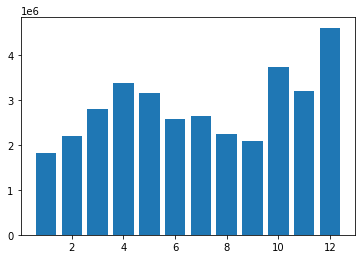

In [0]:
paint = ('red','blue')
plt.bar(x = 'Month',height='TotalSales',data=pd_sale,width = 0.6)
plt.show()

In [0]:
display(pd_sale)

Month TotalSales 1 1822256.721 2 2202022.408 3 2807100.366 4 3390670.223 5 3152606.735 6 2577802.247 7 2647775.747 8 2244467.869 9 2097560.119 10 3736726.86 11 3199603.184 12 4613443.316

Databricks visualization. Run in Databricks to view.

In [0]:
sales_temp.show()

+--------------------+--------------+--------------------+--------------+-----+-------+--------+------+-------------------+----------+-----+
|             Product|    Order Date|        StoreAddress|          City|State|OrderID|Quantity| Price|          OrderDate|ReportYear|Month|
+--------------------+--------------+--------------------+--------------+-----+-------+--------+------+-------------------+----------+-----+
|  Macbook Pro Laptop|12/30/19 00:01|136 Church St, Ne...| New York City|   NY| 295665|       1|1700.0|2019-12-30 00:01:00|      2019|   12|
|  LG Washing Machine|12/29/19 07:03|562 2nd St, New Y...| New York City|   NY| 295666|       1| 600.0|2019-12-29 07:03:00|      2019|   12|
|USB-C Charging Cable|12/12/19 18:21|277 Main St, New ...| New York City|   NY| 295667|       1| 11.95|2019-12-12 18:21:00|      2019|   12|
|    27in FHD Monitor|12/22/19 15:13|410 6th St, San F...| San Francisco|   CA| 295668|       1|149.99|2019-12-22 15:13:00|      2019|   12|
|USB-C Chargi

In [0]:
from pyspark.sql.functions import avg
sale_new =sales_temp.groupBy("State").agg(round(avg("Price"),3).alias("TotalSales")).orderBy("Month")
sales_final.show()

---------------------------------------------------------------------------
AnalysisException                         Traceback (most recent call last)
File <command-168818912691518>:2
      1 from pyspark.sql.functions import avg
----> 2 sale_new =sales_temp.groupBy("State").agg(round(avg("Price"),3).alias("TotalSales")).orderBy("Month")
      3 sales_final.show()

File /databricks/spark/python/pyspark/instrumentation_utils.py:48, in _wrap_function.<locals>.wrapper(*args, **kwargs)
     46 start = time.perf_counter()
     47 try:
---> 48     res = func(*args, **kwargs)
     49     logger.log_success(
     50         module_name, class_name, function_name, time.perf_counter() - start, signature
     51     )
     52     return res

File /databricks/spark/python/pyspark/sql/dataframe.py:2613, in DataFrame.sort(self, *cols, **kwargs)
   2522 def sort(
   2523     self, *cols: Union[str, Column, List[Union[str, Column]]], **kwargs: Any
   2524 ) -> "DataFrame":
   2525     """Returns a ne

In [0]:
sale_months = sales_temp.select( col('OrderId'),col('State'),col('Price'),col('Quantity'),(col('Quantity')*col('Price')).alias("Avg_sales"))
sale_month.show(2)

+-------+-----+------+--------+------+
|OrderId|month| Price|Quantity| Sales|
+-------+-----+------+--------+------+
| 295665|   12|1700.0|       1|1700.0|
| 295666|   12| 600.0|       1| 600.0|
+-------+-----+------+--------+------+
only showing top 2 rows



In [0]:
from pyspark.sql.functions import avg,round
sale_new =sales_temp.groupBy("State").agg(round(avg("Price"),3).alias("TotalSales")).orderBy("State")
sales_final.show()

+-----+-----------+
|Month| TotalSales|
+-----+-----------+
|    1|1822256.721|
|    2|2202022.408|
|    3|2807100.366|
|    4|3390670.223|
|    5|3152606.735|
|    6|2577802.247|
|    7|2647775.747|
|    8|2244467.869|
|    9|2097560.119|
|   10| 3736726.86|
|   11|3199603.184|
|   12|4613443.316|
+-----+-----------+



In [0]:
#Every City and state avg price
#What is the top 3 sales in 2019 in months
# Jan-Dec total sales
# Ashutosh 
#Nikita
#Priya
#Mohit
